In [ ]:
#Sistema recomendador

In [ ]:
from math import ceil
import numpy as np
import pandas as pd
from deepimpute.multinet import MultiNet

import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity

plt.style.use('ggplot')
pd.set_option('display.max_columns', 2)

In [ ]:
file_dir = 'C:/Users/heide/OneDrive/Desktop/recommenders/IMB-dataset/'

In [ ]:
ratings_ = pd.read_csv(file_dir + 'ratings.csv')

In [ ]:
ratings_.head()

,userId,...,timestamp
0,1,...,1204927694
1,1,...,1204927438
2,1,...,1204927435
3,2,...,1436165433
4,2,...,1436165496


In [ ]:
ratings_.describe()

,userId,...,timestamp
count,219475.000000,...,2.194750e+05
mean,1204.355767,...,1.124997e+09
std,699.404729,...,1.784888e+08
min,1.000000,...,8.270984e+08
25%,609.000000,...,9.761503e+08
50%,1180.000000,...,1.113382e+09
75%,1785.000000,...,1.268312e+09
max,2406.000000,...,1.454041e+09


<AxesSubplot:xlabel='rating', ylabel='count'>

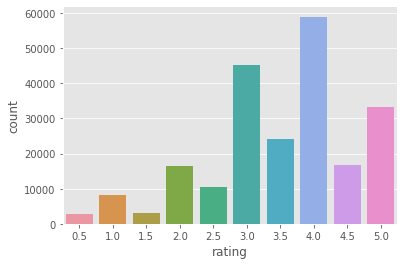

In [ ]:
sns.countplot(x='rating', data=ratings_)

In [ ]:
movies_ = pd.read_csv(file_dir + 'movies.csv')

In [ ]:
movies_.head()

,movieId,...,genres
0,1,...,Adventure|Animation|Children|Comedy|Fantasy
1,2,...,Adventure|Children|Fantasy
2,3,...,Comedy|Romance
3,4,...,Comedy|Drama|Romance
4,5,...,Comedy


In [ ]:
movies_.describe(include='all')

,movieId,...,genres
count,34208.000000,...,34208
unique,NaN,...,1446
top,NaN,...,Drama
freq,NaN,...,5315
mean,75585.571445,...,NaN
std,50726.054238,...,NaN
min,1.000000,...,NaN
25%,26008.750000,...,NaN
50%,86452.000000,...,NaN
75%,119454.500000,...,NaN


In [ ]:
rated_movies = ratings_.merge(movies_, left_on='movieId', right_on='movieId')[['userId', 'movieId', 'title', 'rating']]

In [ ]:
rated_movies.head()

,userId,...,rating
0,1,...,2.5
1,13,...,1.0
2,14,...,3.0
3,17,...,1.0
4,68,...,1.0


In [ ]:
r, c = rated_movies.shape
print(r, c)

219475 4


In [ ]:
mean_ratings = rated_movies.pivot_table(index='title', values='rating', aggfunc=[len, np.mean])

In [ ]:
mean_ratings.columns = ['ratings', 'mean_rating']

In [ ]:
mean_ratings.head()

,ratings,mean_rating
title,,
'71 (2014),1,3.500000
'Round Midnight (1986),3,3.833333
'Til There Was You (1997),7,2.428571
'Twas the Night Before Christmas (1974),1,2.000000
"'burbs, The (1989)",34,3.102941


In [ ]:
mean_ratings[mean_ratings['ratings'] > 100].sort_values(by='mean_rating', ascending=False).head(10)

,ratings,mean_rating
title,,
"Shawshank Redemption, The (1994)",738,4.441734
"Godfather, The (1972)",480,4.371875
"Usual Suspects, The (1995)",511,4.332681
Schindler's List (1993),557,4.302513
12 Angry Men (1957),141,4.290780
"Godfather: Part II, The (1974)",331,4.261329
Rear Window (1954),191,4.259162
To Kill a Mockingbird (1962),145,4.251724
City of God (Cidade de Deus) (2002),161,4.220497


In [ ]:
mean_ratings[mean_ratings.index.str.contains('Star Wars')]

,ratings,mean_rating
title,,
Empire of Dreams: The Story of the 'Star Wars' Trilogy (2004),1,1.000000
Robot Chicken: Star Wars (2007),1,5.000000
Star Wars: Episode I - The Phantom Menace (1999),284,3.095070
Star Wars: Episode II - Attack of the Clones (2002),173,3.138728
Star Wars: Episode III - Revenge of the Sith (2005),138,3.608696
Star Wars: Episode IV - A New Hope (1977),634,4.205836
Star Wars: Episode V - The Empire Strikes Back (1980),512,4.192383
Star Wars: Episode VI - Return of the Jedi (1983),523,4.025813
Star Wars: Episode VII - The Force Awakens (2015),20,4.225000


In [ ]:
## Colaborative Filtering

In [ ]:
rated_movies.head()

,userId,...,rating
0,1,...,2.5
1,13,...,1.0
2,14,...,3.0
3,17,...,1.0
4,68,...,1.0


In [ ]:
# data = ... your data
# all_genes = rated_movies.columns.tolist()
# subset_size = 10000
# imputed = []

# for i in range(ceil(len(all_genes)/subset_size)):
#     gene_subset = all_genes[i*subset_size:(i+1)*subset_size]

#     model = MultiNet()
#     model.fit(rated_movies, genes_to_impute=gene_subset)
#     imputed.append(model.predict(rated_movies))

# imputed = pd.concat(imputed, axis=1)
ratings_pivot = rated_movies.pivot_table(index='userId', columns='title', values='rating', aggfunc=np.mean)

In [ ]:
ratings_pivot.head()

title,'71 (2014),...,À nous la liberté (Freedom for Us) (1931)
userId,,,
1,NaN,...,NaN
2,NaN,...,NaN
3,NaN,...,NaN
4,NaN,...,NaN
5,NaN,...,NaN


In [ ]:
ratings_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406 entries, 1 to 2406
Columns: 11292 entries, '71 (2014) to À nous la liberté (Freedom for Us) (1931)
dtypes: float64(11292)
memory usage: 207.3 MB


In [ ]:
ratings_pivot.fillna(0, inplace=True)

In [ ]:
ratings_pivot.head()

title,'71 (2014),...,À nous la liberté (Freedom for Us) (1931)
userId,,,
1,0.0,...,0.0
2,0.0,...,0.0
3,0.0,...,0.0
4,0.0,...,0.0
5,0.0,...,0.0


In [ ]:
sparse_ratings = sp.sparse.csr_matrix(ratings_pivot.values)

In [ ]:
sparse_ratings

<2406x11292 sparse matrix of type '<class 'numpy.float64'>'
	with 219470 stored elements in Compressed Sparse Row format>

In [ ]:
user_similarity = cosine_similarity(sparse_ratings)
item_similarity = cosine_similarity(sparse_ratings.T)

In [ ]:
user_similarity_df = pd.DataFrame(user_similarity, index=ratings_pivot.index, columns=ratings_pivot.index)

In [ ]:
user_similarity_df.head()

userId,1,...,2406
userId,,,
1,1.0,...,0.072892
2,0.0,...,0.000000
3,0.0,...,0.000000
4,0.0,...,0.047097
5,0.0,...,0.022920


In [ ]:
item_similarity_df = pd.DataFrame(item_similarity, index=ratings_pivot.columns, columns=ratings_pivot.columns)

In [ ]:
item_similarity_df.head()

title,'71 (2014),...,À nous la liberté (Freedom for Us) (1931)
title,,,
'71 (2014),1.0,...,0.0
'Round Midnight (1986),0.0,...,0.0
'Til There Was You (1997),0.0,...,0.0
'Twas the Night Before Christmas (1974),0.0,...,0.0
"'burbs, The (1989)",0.0,...,0.0


In [ ]:
def top_movies(title):
    count = 0
    print('Similar shows to {} include'.format(title))
    for movie in item_similarity_df.sort_values(by=title, ascending=False).index[1:11]:
        print('No: {}: {}'.format(count, movie))
        count += 1



In [ ]:
top_movies('10 (1979)')

Similar shows to 10 (1979) include
No: 0: 12 Rounds (2009)
No: 1: Action Jackson (1988)
No: 2: What a Way to Go! (1964)
No: 3: Into the West (1992)
No: 4: Triggermen (2002)
No: 5: All I Want (Try Seventeen) (2002)
No: 6: Love Field (1992)
No: 7: Adventures of Sharkboy and Lavagirl 3-D, The (2005)
No: 8: Blue Hawaii (1961)
No: 9: 8 Heads in a Duffel Bag (1997)


In [ ]:
def top_user(user):
    count = 0
    print('Similar show to {} include'.format(user))
    similar_indexes = user_similarity_df.sort_values(by=user, ascending=False).index[1:11]
    similar_values =  user_similarity_df.sort_values(by=user, ascending=False).loc[:, user].tolist()[1:11]
    for user, sim in zip(similar_indexes, similar_values):
        print('No: {}: {} Similarity {}'.format(count, user, sim))
        count += 1

In [ ]:
top_user(7)

Similar show to 7 include
No: 0: 101 Similarity 0.5716476829711878
No: 1: 1466 Similarity 0.4708488400081138
No: 2: 463 Similarity 0.41427866962501
No: 3: 818 Similarity 0.3905502746057584
No: 4: 128 Similarity 0.37597317792787416
No: 5: 1776 Similarity 0.37262929711819276
No: 6: 1092 Similarity 0.3620168225031551
No: 7: 2114 Similarity 0.3610538545561311
No: 8: 22 Similarity 0.35747556402905056
No: 9: 383 Similarity 0.34415183902039376


In [ ]:
ratings_[ratings_['userId'] == 7].head()

,userId,...,timestamp
237,7,...,1451817827
238,7,...,1451817834
239,7,...,1451817825
240,7,...,1451817884
241,7,...,1451817833


In [ ]:
ratings_[ratings_['userId'] == 101].head()

,userId,...,timestamp
8989,101,...,1452383413
8990,101,...,1452383422
8991,101,...,1452383411
8992,101,...,1452383419
8993,101,...,1452383427
